In [1]:
import cPickle as pickle
import matplotlib.pylab as pl
%matplotlib inline
import numpy as np

In [2]:
N = 15
parameters, states = pickle.load(open('parameters/triple-state-refined-residual-network-%d' % N, 'rb'))

In [3]:
means, variances, gammas, betas = {}, {}, {}, {}
for key in sorted(states.keys()):
    value = states[key]
    if 'moving_mean' in key:
        if value.shape in means: means[value.shape].append(value)
        else: means[value.shape] = [value]
    elif 'moving_var' in key:
        if value.shape in variances: variances[value.shape].append(value)
        else: variances[value.shape] = [value]
for key in sorted(parameters.keys()):
    value = parameters[key]
    if 'gamma' in key:
        if value.shape in gammas: gammas[value.shape].append(value)
        else: gammas[value.shape] = [value]
    elif 'beta' in key:
        if value.shape in betas: betas[value.shape].append(value)
        else: betas[value.shape] = [value]

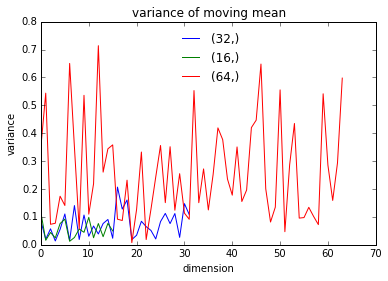

In [4]:
for key, value in means.items():
    mean_array = np.vstack(value)
    std = np.std(mean_array, axis=0)
    pl.plot(range(len(std)), std, label=str(key))
    pl.title('variance of moving mean')
    pl.xlabel('dimension')
    pl.ylabel('variance')
    pl.legend(framealpha=0, loc='best')

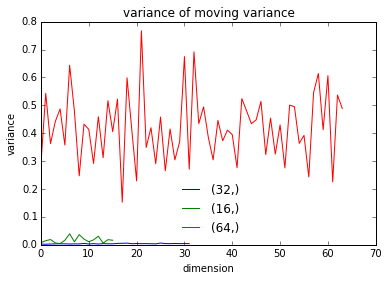

In [5]:
for key, value in variances.items():
    variance_array = np.vstack(value)
    std = np.std(variance_array, axis=0)
    pl.plot(range(len(std)), std, label=str(key))
    pl.title('variance of moving variance')
    pl.xlabel('dimension')
    pl.ylabel('variance')
    pl.legend(framealpha=0, loc='best')

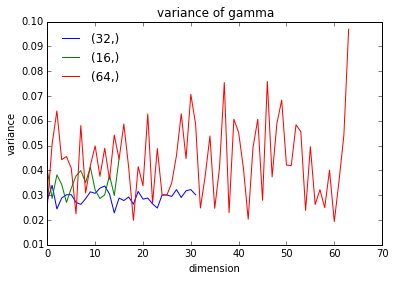

In [6]:
for key, value in gammas.items():
    gamma_array = np.vstack(value)
    std = np.std(gamma_array, axis=0)
    pl.plot(range(len(std)), std, label=str(key))
    pl.title('variance of gamma')
    pl.xlabel('dimension')
    pl.ylabel('variance')
    pl.legend(framealpha=0, loc='best')

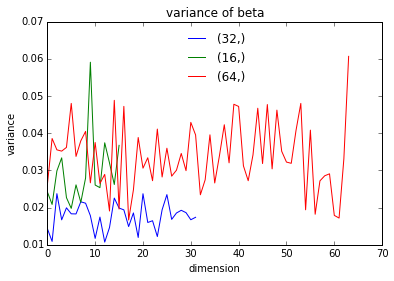

In [7]:
for key, value in betas.items():
    beta_array = np.vstack(value)
    std = np.std(beta_array, axis=0)
    pl.plot(range(len(std)), std, label=str(key))
    pl.title('variance of beta')
    pl.xlabel('dimension')
    pl.ylabel('variance')
    pl.legend(framealpha=0, loc='best')